# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jjjon\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


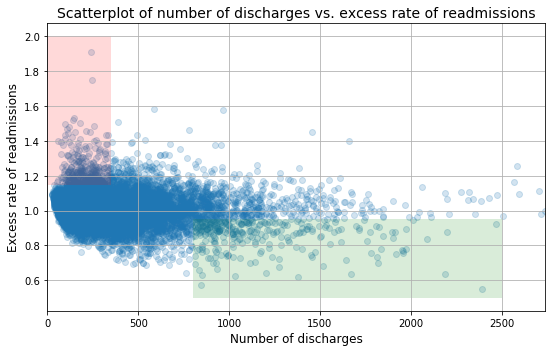

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Exercise solution
## A.
The conclusion that there are more incidences of lower rates of readmission for greater hospital sizes is somewhat correct.  For instance, the largest hospitals actually have a higher rate of readmissions.  The statement that there is a significant correlation between hospital capacity and readmission rates does not seem correct.  For instance if one applied a simple linear fit to the data (see work below) there does not seem to be a significant slope to the trend line.  We can confirm that with a Pearson Correlation Coefficient.  The statistics section in the report also chooses different cutoff points to take the mean excessive rate of readmission and the percentage of points above rate of readmission of 1.  Below it is also shown that these values are highly dependent as to where the cutoff point is choosen.  Thus, though there is a slight correlation of hospital capacity and readmission rate it may be overly burdensome to require only the small hospitals to demonstrate upgraded resource allocation.

## B
1. The hypothesis test could be centered around the slope of the linear fit for the data or the Pearson Correlation Coefficient.  Here the null hypothsis is that the Pearson Correlation Coefficient is equal to zero (corresponding to no correlation between hospital capacity and readmission rate).  The alternative hypothesis is that the Pearson Correlation Coefficient does not equal zero.
1. The p-value = 0.0 when using a bootstrap method on the Pearson Correlation Coefficient.
1. The statistical significance for $\alpha$ = 0.01 shows that one will reject the null hypothesis (i.e. there is a correlation between the hospital discharge rate and the readmission rate).
1. The statistical significance is that the Pearson Correlation Coefficient is not zero (and is slightly negative).  Practically, this means there is a correlation between hospital discharge rate and readmission rate.  The 95% confidence interval for the Pearson Correlation Coefficient is [-0.11504904 -0.07199115].  This means that there are a very weak correlation, unlike the reports claim in which they say there is a strong correlation between hospital discharge rate and readmission rate.  This does not change our recommendations.  It simply means that the original report overemphasizes the importance of hospital discharge rate on the readmission rate.
1. The advantage of this type of plot is that each individual hospital data point is shown prominently.  The disadvantage is that many of the smaller hospitals are compacted tightly a small range of hospital discharge rates (i.e. there are a lot of small hospitals and few big hospitals).  A better way of showing this data is using a logarithmic scale for the hospital discharge rate to show that there is little difference in the readmission rate for hospital sizes.  We show this new graph below along with the best fit linear trend line to demonstrate that there is little correlation between the hospital discharge rate and the excessive readmission rate. 

# Pearson Correlation Coefficient Hypothesis Test

95% confidence interval for pearson correlation coeffficient [-0.11509691 -0.07041234]
The p-value is  0.0


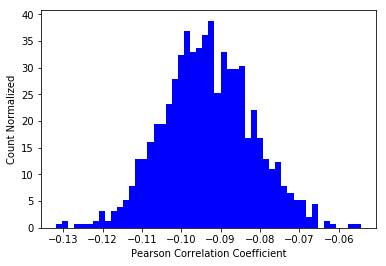

In [7]:
# Your turn
#Here a bootstrap method is applied to the Pearson Correlation Coefficient for between the hospital 
#discharge rate versus the excessive readmission rate.
#Save data as array
x_s = np.array(x)
y_s = np.array(y)

#Define a function to bootstrap sample the pearson correlation coefficient
def bs_lin_fit(x, y, size = 1):
    a = np.empty(size)
    b = np.empty(size)
    indx = np.arange(len(x))
    
    for index in range(size):
        temp_indx = np.random.choice(indx, len(indx))
        
        x_temp = x[temp_indx]
        y_temp = y[temp_indx]

        #a_temp, b_temp = np.polyfit(x_temp, y_temp, 1)
        p_temp = stats.pearsonr(x_temp, y_temp)
        
        a[index], b[index] = p_temp[0], p_temp[1]
    return a, b

#Find the Pearson Correlation Coefficient using bootstrap method
a, b = bs_lin_fit(x_s, y_s, 1000)
print('95% confidence interval for pearson correlation coeffficient', np.percentile(a, [2.5, 97.5]))

#Calculate the linear polynomial fit
a_t, b_t = np.polyfit(x_s, y_s, 1)

#Calculate the p-value 
pvalue = np.sum(a>=0)/len(a)
p_matrix = stats.pearsonr(x_s, y_s)
print('The p-value is ', pvalue)


plt.hist(a, color = 'blue', bins = 50, density = True)
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Count Normalized')
plt.show()


Taking a linear fit we see that the pearson coefficient between excess rate of readmission and number of discharges is -0.093.  This means that there is a weakly negative linear correlation between the two variables.  Furthermore, when taking a bootstramp method we do see that there is a correlation however this correlation is weak.

# New Logarithm Plot

C:\Users\jjjon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


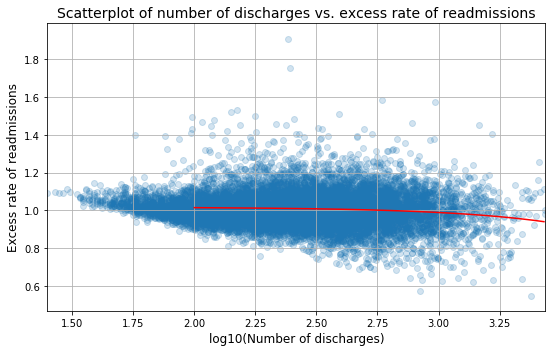

In [11]:
#Create new plot to convery same information in different way

#Create a linear fit line for data
x_line = np.arange(0, max(x), 100)
y_line = a_t*x_line + b_t

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log10(x), y,alpha=0.2)
ax.plot(np.log10(x_line), y_line, color = 'red')

ax.set_xlim([np.log10(min(x)), np.log10(max(x))])
ax.set_xlabel('log10(Number of discharges)', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Challening the statistics section of the report
The analysis makes claims about the percentage above 1 and mean of the excess rate of readmission for different ranges of data.  Here the mean and percentage above 1 for the excess rate of readmission is shown for above and below a certain cutoff point.  This will allow one to see how the data can be interpreted depending on if the statistic if calculated above or below a certain number of discharge cutoff.

0.35294117647058826 0.7


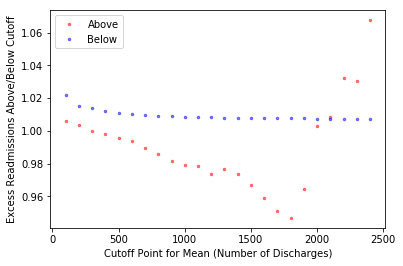

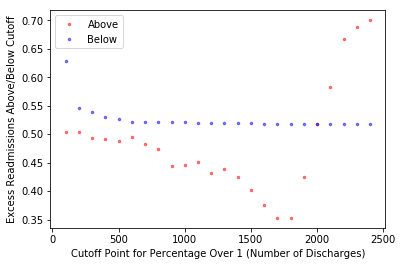

In [80]:
#Calculate the mean of excess of readmissions for value of number of discharges above and below
count = 0
above_mean = np.empty(len(range(100, 2500, 100)))
below_mean = np.empty(len(range(100, 2500, 100)))
above_per = np.empty(len(range(100, 2500, 100)))
below_per = np.empty(len(range(100, 2500, 100)))
x_hold = np.empty(len(range(100, 2500, 100)))

for index in range(100, 2500, 100):
    above_mean[count] = np.mean(y_s[ x_s > index ])
    below_mean[count] = np.mean(y_s[ x_s <= index])
    above_per[count] = np.sum(y_s[ x_s > index ] >= 1.0)/len(y_s[ x_s > index ])
    below_per[count] = np.sum(y_s[ x_s <= index ] >= 1.0)/len(y_s[ x_s <= index ])
    x_hold[count] = index
    count += 1

print(min(above_per), max(above_per))
plt.plot(x_hold, above_mean, color = 'red', marker='.', linestyle='none', alpha = 0.5, markersize = 5)
plt.plot(x_hold, below_mean, color = 'blue', marker='.', linestyle='none', alpha = 0.5, markersize = 5)
plt.xlabel('Cutoff Point for Mean (Number of Discharges)')
plt.ylabel('Excess Readmissions Above/Below Cutoff')
plt.legend(['Above', 'Below'], loc='upper left')
plt.show()

plt.plot(x_hold, above_per, color = 'red', marker='.', linestyle='none', alpha = 0.5, markersize = 5)
plt.plot(x_hold, below_per, color = 'blue', marker='.', linestyle='none', alpha = 0.5, markersize = 5)
plt.xlabel('Cutoff Point for Percentage Over 1 (Number of Discharges)')
plt.ylabel('Excess Readmissions Above/Below Cutoff')
plt.legend(['Above', 'Below'], loc='upper left')
plt.show()

These graphs show that depending on where one draws the cutoff to average data above and below a cutoff of number of discharges will significantly effect the conclusions.  In particular, notice that the report uses a cutoff of 100 for calculating a statistic.  As seen in the excess rate of readmission percentage above 1 graph we can see that using that cutoff and calculating the statistic below 100 number of discharges results in an extreme value.  Had the cutoff point been 200 then the percentage above 1 of excess rate of readmission would have been only 54.5% rather than 63%.  Similarily, in the report they calculated statistics above number of discharges of 1000.  Notice, depending on the choice for this cutoff we can see that the percentage above 1 can vary anywhere between 35-70%.  The statistics for the upper cutoff point highly depend on the cutoff point chosen.  Therefore, the values used in the report are somewhat misleading.  The trend (i.e. as the number of discharges goes up excess rate of readmission goes down) may still hold true but the cutoff values used have to be justified more carfully.